# Ejemplo practico energia solar termica para suministro de ACS para un edificio multifamiliar

Se quiere desarrollar un proyecto de instalación solar térmica de baja temperatura para
suministro de agua caliente sanitaria (ACS) en un edificio residencial multifamiliar a rehabilitar. El edificio está situado en Alcalá de Henares (Madrid).


La instalación está compuesta por el sistema de captación solar, con panel solar plano, situado en una cubierta del edificio con orientación sur e inclinación 60°; un sistema de intercambio y una acumulación centralizada. El sistema de aporte de energía convencional auxiliar es de gas natural, en línea descentralizado, en cada vivienda.

El proyecto se realiza cumpliendo el RD 314/2006 CTE, DB-HE: Ahorro de energía, sección HE 4
(“Contribución solar mínima de ACS”). A continuación, se desarrollan los puntos básicos del proyecto:

* Localidad: Alcalá de Henares (Madrid).
* Latitud: 40,5° N.
* Zona climática: IV.
* Tipo de edificio: residencia multifamiliar, 10 viviendas de 4 dormitorios, 40 viviendas de 3 dormitorios y 20 de 2 dormitorios.
* Tipo de integración de captadores: superposición.
* Sistema de energía auxiliar: gas natural.
* Orientación de campo de captadores: sur.
* Inclinación de campo de captadores: 55°.
* Condiciones del entorno: sin sombras posibles.

Estimación de la demanda energética de ACS. Según lo estipulado en el CTE DB-HE4

| Nro. Dormitorios | Nro. Personas |
| ---------------- | ------------- |
| 1 | 1,5 |
| 2 | 3 |
| 3 | 4 |
| 4 | 6 |
| 5 | 7 |
| 6 | 8 |
| 7 | 9 |
| >7 | 1 por dorm. |

El consumo de ACS estimado se toma según el valor mínimo recomendado por el CTE HE-4 3.1.1.1
para vivienda multifamiliar 22 l/día. Así pues, el consumo diario total de la vivienda es:

| Nro. dormitorios | Nro. viviendas. | Nro. personas |
| ---------------- | --------------- | ------------- |
| 4 | 10 | 6 |
| 3 | 40 | 4 |
| 2 | 20 | 3 |

In [1]:
Total_personas = (10*6)+(40*4)+(20*3)
Consumo_diario = 22 * Total_personas
print("Total de habitantes en el edificio: {} personas".format(Total_personas))
print("El edificio requiere {} litros de ACS diariamente".format(Consumo_diario))

Total de habitantes en el edificio: 280 personas
El edificio requiere 6160 litros de ACS diariamente


| Total residentes | Consumo/persona | Consumo total ACS |
| ---------------- | --------------- | ----------------- |
| 280 | 22 l/día | **6.160 l/día (6,16 m3/día)** |

La actualización del CTE, de septiembre de 2013, no hace distinción en cuanto a los litros estimados de ACS por persona y día según se trate de vivienda unifamiliar o multifamiliar, fijando ese volumen en 28 l/persona/día. Bajo este principio, la demanda total de agua caliente estará en **7.840 l/día** o **7,84 $m^3$/día**. La temperatura final de acumulación se supone $T_{ACS}$ = 60 °C .

La norma CTE 2006 establece los siguientes porcentajes mínimos de generación de ACS con energía renovable en función de la zona climática y la demanda total de agua:
![contribucion-solar-minima-ACS-2006](contribucion-solar-minima-ACS-2006.jpg)

En cualquiera de los dos casos de consumo de agua mencionados, la contribución solar mínima exigida bajo esta norma es 70%. Sin embargo, la regulación CTE de 2013 hizo ajustes y simplificaciones a esta aportación:
![contribucion-solar-minima-ACS](contribucion-solar-minima-ACS.jpg)

Bajo estas condiciones, la contribución solar mínima sería en este caso del 60%. Pero para este ejercicio nos regiremos por el estándar de 2006, tanto para el consumo como para la contribución mínima.

Debemos determinar la demanda energética anual de este edificio para saber cuánto debe aportar la energía solar como mínimo, 70% de la demanda energética.

La demanda energética mensual para un mes *i* viene dada por la siguiente fórmula:

$ DE_{mes,i} = D_{dia}.N_{días,i}.C_p.\rho.(T_{ACS}-T_{red,i}) $

Donde:
* $D_{dia}$: Demanda diaria de ACS ($m^3$)
* $N_{días,i}$: Número de días del mes *i*
* $C_p$: Calor específico del agua (1 Kcal/Kg.°C)
* $\rho$: Densidad del agua, típicamente 1.000 Kg/$m^3$
* $T_{ACS}$: Temperatura de agua caliente, 60 °C
* $T_{red,i}$: Temperatura promedio de agua de red en el mes *i*

La Demanda energética obtenida de la anterior ecuación viene expresada en Kcal, para transformarla a KWh es neceario escarlarla por $1,16.10^{-3} KWh/Kcal$.

La siguiente tabla nos ilustra las temperaturas de agua de red mensuales, $T_{red}$, para cada capital provincial de España.

![Temperaturas-agua_red-Esp-mes](Temperaturas-agua_red-Esp-mes.png)

Alcalá de Henares está muy próxima a Madrid, pero a una elevación de 594 m.s.n.m., 61 metros más bajo que Madrid. Bien pudiéramos despreciar el efecto de esa pequeña diferencia de altitud, pero podemos aplicar la fórmula de ajuste de temperaturas de la guía ASIT en función de la diferencia de altitud con respecto a una referencia cercana conocida y el mes de año:

$T_{red,i} = T_{redCP,i} - B.\Delta Z$

Donde:

* $T_{redCP,i}$: Temperatura por mes de agua de red de la capital provincial, valor conocido
* B: Constante equivalente a 0,0066 para los meses de octubre a marzo y 0,0033 para los meses de abril a septiembre.
* $\Delta Z$: Diferencia de altura entre la nueva localidad y la capital provincial.

Procedemos a calcular la temperatura de agua de red aproximada para Alcalá de Henares tomando en cuenta su diferencia de altitud con respecto a Madrid y la constante B para los distintos meses del año:

In [2]:
meses = ['ENE','FEB','MAR','ABR','MAY','JUN','JUL','AGO','SEP','OCT','NOV','DIC']
dias = [31,28,31,30,31,30,31,31,30,31,30,31]
Tred_MAD = [8,8,10,12,14,17,20,19,17,13,10,8]
DZ = 594 - 655
Tred = []
for i in range(12):
    if i in [0,1,2,9,10,11]: #En Python el primer indice es 0, correspondiente a enero, dic. es 11
        Tred.append(round(Tred_MAD[i] - 0.0066*DZ, 1))
    else:
        Tred.append(round(Tred_MAD[i] - 0.0033*DZ, 1))
Tred

[8.4, 8.4, 10.4, 12.2, 14.2, 17.2, 20.2, 19.2, 17.2, 13.4, 10.4, 8.4]

Una vez tenemos conocida la temperatura de red local, calculamos la demanda energética requerida para calentar el ACS a 60°C.

In [3]:
DE_mes = []
for i in range(12):
    DE_mes.append(round(0.00116*(Consumo_diario/1000)*dias[i]*1*1000*(60-Tred[i]), 2))
DE_mes

[11430.1,
 10323.96,
 10987.07,
 10246.79,
 10145.32,
 9174.95,
 8816.24,
 9037.75,
 9174.95,
 10322.53,
 10632.65,
 11430.1]

Para facilitar nuestra lectura y almacenamiento de la información, la cargamos a una tabla Pandas:

In [4]:
import pandas as pd

df = pd.DataFrame(zip(meses,dias,Tred,DE_mes),columns=['MES','DIAS','T_red','DE_mes'])
df.head(12)

,MES,DIAS,T_red,DE_mes
0,ENE,31,8.4,11430.10
1,FEB,28,8.4,10323.96
2,MAR,31,10.4,10987.07
3,ABR,30,12.2,10246.79
4,MAY,31,14.2,10145.32
5,JUN,30,17.2,9174.95
6,JUL,31,20.2,8816.24
7,AGO,31,19.2,9037.75
8,SEP,30,17.2,9174.95
9,OCT,31,13.4,10322.53


In [5]:
DE_anual = sum(df['DE_mes'])
print("Demanda energética anual: {} KWh".format(DE_anual))
Contrib_sol_min = 0.7 * DE_anual
print("Contribución solar mínima anual: {} KWh".format(round(Contrib_sol_min),2))

Demanda energética anual: 121722.41 KWh
Contribución solar mínima anual: 85206 KWh


Este edificio multifamiliar en Alcalá de Henares requiere 121.722,41 KWh para calentar el agua caliente sanitaria durante un año. Dada la demanda diaria de ACS y la zona climática IV donde se ubica la edificación, la contribución solar mínima exigida tiene que ser el 70% de la demanda energética total en un año, según la norma 2006. Es decir que la contribución energética solar mínima deberá ser **85.206 KWh por año**.

Antes de determinar la configuración de paneles solares debemos conocer primero la radiación solar en la zona en función de la orientación e inclinación de los paneles y afectación de sombras, en el caso que aplique. Asimismo, en este punto debe verificarse el cumplimiento de los límites establecidos por el CTE DBHE4 2006 (2.1.8), de pérdidas por orientación e inclinación y por sombras.

La radiación solar resultante viene dada por la siguiente ecuación:

$G_{di}(\beta) = k. G_{di}(0)$

$G_{di}(0)$ es la radiación horizontal (cero grados de inclinación) promedio mensual que se presenta en la localidad de interés. Dada la gran cercanía con Madrid, los datos conocidos para la capital española son aplicables para Alcalá de Henares.

Estos valores, KWh/m2, los almacenamos en la siguiente lista:

In [6]:
Gdi_MAD = [1.86,2.94,3.78,5.22,5.81,6.53,7.22,6.42,4.69,3.17,2.08,1.64]

El factor k de corrección por mes lo podemos descargar de la tabla de factores k elaborada por Censolar para distntas inclinaciones a una latitud de 40°N:
![factorK-correc-radiac-sol-Censolar](factorK-correc-radiac-sol-Censolar.jpg)

Los factores k que nos corresponden, latitud 40 e inclinación 55, son:

In [7]:
k_55 = [1.4,1.27,1.1,.94,.82,.78,.82,.95,1.15,1.38,1.54,1.52]

In [8]:
k_55_prod = 1
for k in k_55:
    k_55_prod = k_55_prod * k
k_55_prod

3.4028236589088823

Las radiaciones solares incidentes con páneles a 55 grados de inclinación mirando hacia el sur por mes, en KWh/m2 son: 

In [9]:
Gdi_55 = []
for i in range(12):
    Gdi_55.append(round(Gdi_MAD[i]*k_55[i], 2))
Gdi_55

[2.6, 3.73, 4.16, 4.91, 4.76, 5.09, 5.92, 6.1, 5.39, 4.37, 3.2, 2.49]

La energía solar producida en un mes, $EI_{mes}$, por la radiación solar incidente a la inclinación determinada se obtiene multiplicando la radiación mensual promedio inclinada, $G_{di}(\beta)$ por el número de días del mes.

$EI_{mes} = G_{di}(\beta).N_{días,mes}$

In [10]:
EI_mes = []
for i in range(12):
    EI_mes.append(round(Gdi_55[i]*dias[i], 2))
EI_mes

[80.6,
 104.44,
 128.96,
 147.3,
 147.56,
 152.7,
 183.52,
 189.1,
 161.7,
 135.47,
 96.0,
 77.19]

In [11]:
df_rad = pd.DataFrame(zip(meses,dias,Gdi_MAD,k_55,Gdi_55,EI_mes),columns=['MES','DIAS','G0','k55','G55','EI'])
df_rad.head(12)

,MES,DIAS,G0,k55,G55,EI
0,ENE,31,1.86,1.40,2.60,80.60
1,FEB,28,2.94,1.27,3.73,104.44
2,MAR,31,3.78,1.10,4.16,128.96
3,ABR,30,5.22,0.94,4.91,147.30
4,MAY,31,5.81,0.82,4.76,147.56
5,JUN,30,6.53,0.78,5.09,152.70
6,JUL,31,7.22,0.82,5.92,183.52
7,AGO,31,6.42,0.95,6.10,189.10
8,SEP,30,4.69,1.15,5.39,161.70
9,OCT,31,3.17,1.38,4.37,135.47


In [12]:
print("Proporción de radiación inclinada G55 promedio con respecto a la radiación plana promedio: {}%".format(round(sum(Gdi_MAD)*100/sum(Gdi_55),2)))
print("Energía solar que se puede producir en un año con un captador orientado al sur a 55° de inclinación: {} KWh/m2".format(sum(EI_mes)))
print("Superficie de captación necesarios para alcanzar la demanda energética anual: {} m2".format(round(sum(DE_mes)/sum(EI_mes), 1)))

Proporción de radiación inclinada G55 promedio con respecto a la radiación plana promedio: 97.42%
Energía solar que se puede producir en un año con un captador orientado al sur a 55° de inclinación: 1604.54 KWh/m2
Superficie de captación necesarios para alcanzar la demanda energética anual: 75.9 m2


La inclinación de 55° alcanza a approvechar el 97,4% de la radiación incidente sobre una superficie plana, lo cual es aceptable. Sin embargo, dicha inclinación optimiza la captación energética en los meses más fríos del año, cuando la demanda energética para calentar ACS es más alta. A esta inclinación, al año un metro cuadrado de captador puede ser capaz de generar 1604,5 Kwh. Para cubrir la demanda energética del edificio sería necesario contar con al menos 75,9 m2 de captadores solares. Como el rendimiento es siempre menor al 100%, esa área de captación se incrementa.

Concer más del diseño y dimensiones del sistema de captación solar requiere de la aplicación del método *f-chart*. Pero antes necesitamos conocer los parámetros técnicos de los páneles solares a utilizar:

| Parámetro | Propiedad |
| ---------------- | ----------------- |
|Superficie apertura| 2,205 m2 |
| Eficiencia óptica | 0,773 |
| Coef. glob.perd. | 0,00324 KW/m2.°C |
| MAI | 0,922 |
| FCint | 0,95 |

El método *f-chart* permite calcular de manera empírica la fracción solar mensual o $f_{mes}$ que puede aportar un captador en función de dos variables D1 y D2.

$f_{mes} = 1,029.D_1 - 0,065.D_2 - 0,245.D_1^2 + 0,0018.D_2^2 + 0,0215.D_1^3$

$D_1$ representa la relación entre la energía absorbida y la demanda energética por mes.

$D_1 = {E_{absor} \over DE_{mes}} = {S_C.\eta_0.MAI.F_{CInt}.G_{dm}.N_{dias} \over DE_{mes}}$

$S_C$ corresponde a la superficie de captación, incluye todo el arreglo de captadores de 2,205 m2 cada uno. Tenemos pendiente obtener este dato. $\eta_0$ es la eficiencia óptica de 0,773; el modificador de ángulo de incidencia (MAI) es 0,922; $F_{CInt}$ el factor de corrección del conjunto captador-intercambiador; $G_{dm}$ la irradiación solar diaria promedio para ese mes y $N_{dias}$ el número de días del mes.

D2 representa las pérdidas del captador con respecto a la demanda mensual. Viene dado por la siguiente ecuación:

$D_2 = {E_{perd} \over DE_{mes}} = {S_C.K_{global}.F_{CInt}.(100 - T_{amb}).FC_{acum}.FC_{ACS}.24.N_{dias} \over DE_{mes}}$

$K_{global}$ es el coeficiente global de pérdida, dato que provee el fabricante de los paneles. $T_{amb}$ corresponde a la temperatura ambiente promedio mensual de la localidad de estudio, información disponible enn portales meteorológicos. Tenemos las siguientes temperaturas promedio de Alcalá de Henares:

In [14]:
Tamb_mes = [6,8,11,13,18,23,28,26,21,15,11,7]

Con respecto al factor de corrección del acumulador, $FC_{acum}$, tenemos una fórmula empírica que lo relaciona con el volumen del acumulador solar $V_{acum}$:

$FC_{acum} = ({{V_{acum} / S_C} \over {75 l/m^2}})^{-1/4}$

A su vez, la proporción entre el volumen del acumulador y la superficie del captador debe estar entre 50 y 180 litros por m2.

$50 l/m^2 < \frac {V_{acum}} {S_C} < 180 l/m^2$

In [15]:
import math

In [16]:
Facum_min = round(math.pow(180/75,-0.25), 2)
Facum_max = round(math.pow(50/75,-0.25), 2)
print("Factor de correccion del acumulador entre {} y {}".format(Facum_min, Facum_max))

Factor de correccion del acumulador entre 0.8 y 1.11


Tenemos que el factor de corrección del acumulador está entre valores de 0,8 y 1,11. 

Al principio de este caso determinamos que el consumo diario de ACS en este edificio multifamiliar es de 6.160 litros. El pliego de condiciones técnicas del IDAE recomienda que el volumen de acumulación sea aproximado al del consumo diario. Asumimos este valor como V_{acum}.

La fórmula $\frac {V_{acum}} {S_C}$ la podemos despejar para estimar el rango de superficie de captación que necesitamos:

$\frac {V_{acum}} {50 l/m^2} > {S_C} > \frac {V_{acum}} {180 l/m^2}$

In [22]:
SC_min = Consumo_diario/180
SC_max = Consumo_diario/50
print("Superficie de captación sugerido entre {} y {} m2".format(round(SC_min,2), round(SC_max,2)))
print("Número de captadores entre {} y {}".format(round(SC_min/2.205,1), round(SC_max/2.205,1)))

Superficie de captación sugerido entre 34.22 y 123.2 m2
Número de captadores entre 15.5 y 55.9


Vamos a asumir la máxima cantidad posible de captadores para asegurar una mayor generación solar de ACS, 56 captadores, aasociado también a un factor de corrección de acumulación $FC_{acum}$ de 1,1. La superficie de captación nos queda en:

In [59]:
SC = round(56 * 2.205,1) 
print("Superficie de captación escogida: {} m2".format(SC))

Superficie de captación escogida: 123.5 m2


Contando con la superficie de captación escogida podemos estimar los valores D1:

In [60]:
D1_mes = []
for i in range(12):
    D1_mes.append(round(SC*0.773*0.922*0.95*Gdi_55[i]*dias[i]/DE_mes[i], 2))
D1_mes

[0.59, 0.85, 0.98, 1.2, 1.22, 1.39, 1.74, 1.75, 1.47, 1.1, 0.75, 0.56]

Para calcular D2 todavía debemos estimar $FC_{ACS}$, el cual es el factor de corrección que relaciona la temperatura mínima de agua caliente, 60°C en nuestro caso, la del agua de red y la ambiente. Se calcula de la siguiente manera, siendo variable por cada mes:

$FC_{ACS} = {11,6 + 1,18.T_{ACSmin} + 3,86.T_{red} - 2,32.T_{amb} \over 100 - T_{amb}}$

In [19]:
F_ACS = []
for i in range(12):
    F_ACS.append(round((11.6+1.18*60+3.86*Tred[i]-2.32*Tamb_mes[i])/(100-Tamb_mes[i]), 2)) 
F_ACS

[1.07, 1.05, 1.09, 1.14, 1.16, 1.24, 1.33, 1.3, 1.27, 1.17, 1.09, 1.06]

Ya contamos con todas las variables que nos permitan estimar D2 para cada mes. Importante asegurarse de que el coeficiente de pérdida $K_{global}$ y la demanda energética DE estén en la misma escala, en W o KWh:

In [61]:
D2_mes = []
for i in range(12):
    D2_mes.append(round(SC*0.00324*0.95*(100-Tamb_mes[i])*round(math.pow((Consumo_diario/SC)/75,-0.25), 2)*F_ACS[i]*24*dias[i]/(DE_mes[i]), 2))
D2_mes

[2.76, 2.65, 2.77, 2.94, 2.94, 3.16, 3.41, 3.34, 3.32, 3.02, 2.77, 2.71]

Con estos datos ya podemos calcular la fracción solar mensual del método *f-chart*:

In [62]:
f_mes = []
for i in range(12):
    f_mes.append(round(1.029*D1_mes[i]-0.065*D2_mes[i]-0.245*math.pow(D1_mes[i],2)+0.0018*math.pow(D2_mes[i],2)+0.0215*math.pow(D1_mes[i],3), 4))
f_mes

[0.3606,
 0.5512,
 0.6271,
 0.7436,
 0.7542,
 0.8273,
 0.9612,
 0.9686,
 0.8555,
 0.6842,
 0.4768,
 0.3403]

Una vez que conocemos la fracción de cada mes, podemos estimar la energía solar útil aportada al agua multiplicando dicha fracción por la correspondiente demanda energética de cada mes:

$EU_{solar,mes} = f_{mes}.DE_{mes}$

In [63]:
EU_solar = []
for i in range(12):
    EU_solar.append(round(f_mes[i]*DE_mes[i],2))
EU_solar

[4121.69,
 5690.57,
 6889.99,
 7619.51,
 7651.6,
 7590.44,
 8474.17,
 8753.96,
 7849.17,
 7062.68,
 5069.65,
 3889.66]

Vamos a estimar que porcentaje o fracción solar anual, *f* representa el total de la energía solar útil con respecto a la demanda energética anual:
$f = \frac {\sum EU_{solar,mes}} {\sum DE_{mes}}$ 

In [64]:
f = sum(EU_solar) / sum(DE_mes)
print("Fracción de la demanda energética aportada por la energía solar: {:.1f}%".format(f*100))

Fracción de la demanda energética aportada por la energía solar: 66.3%


Como resultado tenemos que un arreglo de 56 paneles de la descripción técnica dada, en este edificio ubicado en Alcalá de Henares es capaz de proveer un 66,3% de la energía demandada para calentar 6.180 litros diarios de ACS, la cual es almacenada en un acumulador de similar capacidad. Bajo la normativa de 2006 no se llega al mínimo de cobertura de 70%, aunque para la de 2013 se excede el mínimo de 60%. Para llegar al mínimo de 70% será necesario añadir más captadores del tipo determinado, 61 en este caso. No osbtante, en este caso nos restringimos a los 56 paneles

In [65]:
print("Contribución solar anual: {} KWh".format(round(sum(EU_solar)),2))

Contribución solar anual: 80663 KWh


Al cubrir el 66,3% de la demanda energética anual estamos contribuyendo con **80.663 KWh al año**.

Podemos resumir en una tabla los parámetros obtenidos en este caso de estudio:

In [67]:
columnas = ['MES','DIAS','T_RED','T_AMB','GDI_35','DE_MES','D1','D2','F_MES','EU_SOL']
df2 = pd.DataFrame(zip(meses,dias,Tred,Tamb_mes,Gdi_55,DE_mes,D1_mes,D2_mes,f_mes,EU_solar),columns=columnas)
df2.head(12)

,MES,DIAS,T_RED,T_AMB,GDI_35,DE_MES,D1,D2,F_MES,EU_SOL
0,ENE,31,8.4,6,2.60,11430.10,0.59,2.76,0.3606,4121.69
1,FEB,28,8.4,8,3.73,10323.96,0.85,2.65,0.5512,5690.57
2,MAR,31,10.4,11,4.16,10987.07,0.98,2.77,0.6271,6889.99
3,ABR,30,12.2,13,4.91,10246.79,1.20,2.94,0.7436,7619.51
4,MAY,31,14.2,18,4.76,10145.32,1.22,2.94,0.7542,7651.60
5,JUN,30,17.2,23,5.09,9174.95,1.39,3.16,0.8273,7590.44
6,JUL,31,20.2,28,5.92,8816.24,1.74,3.41,0.9612,8474.17
7,AGO,31,19.2,26,6.10,9037.75,1.75,3.34,0.9686,8753.96
8,SEP,30,17.2,21,5.39,9174.95,1.47,3.32,0.8555,7849.17
9,OCT,31,13.4,15,4.37,10322.53,1.10,3.02,0.6842,7062.68


In [76]:
import matplotlib.pyplot as plt

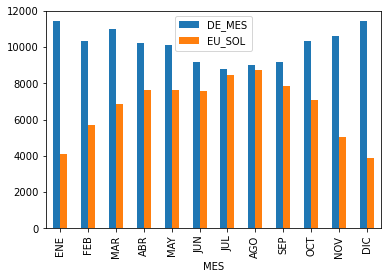

In [77]:
df2.plot(x = 'MES', y = ['DE_MES','EU_SOL'], kind = 'bar')

Lo que dictamina el CTE DB-HE-4 de 2013 con respecto a la protección contra los sobrecalentamientos es que en ningún mes la generación solar debe superar en un 10% a la demanda energética estimada y que dicha generación no puede superar la demanda en tres meses seguidos. En nuestro caso, en ningún mes se alcanza a cubrir el 100% de la demanda energética mensual. Por lo tanto, estamos dentro de las normas.

Calculemosr el rendimiento medio anual de la instalación, que resulta de sacar la proporción de la sumatoria anual de la energía solar útil entre el producto de la superficie de captación por la sumatoria anual de la energía incidente EI:

$\eta_{sistema} = {\sum EU_{solar} \over \sum S_C.EI_{mes}}$

In [69]:
print("Rendimiento anual del sistema: {:.1f}%".format(100*sum(EU_solar)/(SC*sum(EI_mes))))

Rendimiento anual del sistema: 40.7%


El rendimiento medio anual del sistema es de **40,7%**, en cumplimiento con la norma CTE DB-HE 4 2006 que busca un rendimiento igual o superior al 40%.

En instalaciones grandes, se dispone un intercambiador externo al acumulador. El requisito de potencia exigido por el CTE DB-HE4 para los intercambiadores externos es:

$P_{inter} (W) >= 500 . SC$

In [70]:
Pinter = 500 * SC
print("Potencia de intercambiador externo igual o superior a {} KW".format(round(Pinter/1000,2)))

Potencia de intercambiador externo igual o superior a 61.75 KW


La potencia de intercambiador externo deberá ser igual o superior a 61,75 KW.

Volviendo al sistema de captación, el fabricante del captador solar recomienda un caudal de 110 l/h. Como cada captador tiene un área de 2,205 m2, el caudal por área en estos captadores será:

In [72]:
Qarea = 110 / 2.205
print("Caudal por área: {} l/h.m2".format(round(Qarea,2)))

Caudal por área: 49.89 l/h.m2


El fluido de calentamiento pasará a un ritmo de 49,9 l/h por cada m2 de captación.

El caudal de flujo viene dado por la siguiente ecuación:

$Q (l/h) = Q_{area} . N_{paralelo} . S_{captador}$

El número de baterías de captadores en paralelo $N_{paralelo}$ depende mucho del espacio en cubierta, incluido el espacio de separación entre baterías para que no se hagan sombra. Digamos que el edificio puede albergar 7 panales en serie, con lo cual nos quedan 8 baterías paralelas.

In [75]:
Nparal = round(56/7)
Q = Qarea * Nparal * 2.205
print("Caudal con {} baterías en paralelo: {} l/h".format(Nparal, round(Q,1)))

Caudal con 8 baterías en paralelo: 880.0 l/h


Si no se pueden ubicar tantos paneles en serie, deberá compensarse colocando más series en paralelo, lo cual implicará un mayor caudal de sistema.